In [226]:
import requests
import os
import pandas as pd
import tweepy
from datetime import date
from datetime import datetime
import time
import csv
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Data Gathering ##

In [168]:

#First dataframe
df1=pd.read_csv('twitter-archive-enhanced (3).csv',sep=',')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [169]:
# Second dataframe data gathering by web scraping
image_prediction_url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'


In [170]:
response = requests.get(image_prediction_url)
print(image_prediction_url.split('/')[-1])



image-predictions.tsv


In [171]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [172]:
open (image_prediction_url.split('/')[-1], mode='wb').write(response.content)


335079

In [173]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [178]:
# Taking third dataframe information from Twitter with API
#deleted accesstoken for submission
consumer_key = 'y6w3zGhBvGZcedyi0kgPHgcEm'
consumer_secret = 'aaQmAVt00wKzb18TdJXFNlOQlvr7jfeKdKvvxbXbv3NeWAQvb0'
access_token = '1226577176570368000-qO6bHvuLxpAbX9TOdZumiyWeTeFE1F'
access_secret = 'afN5l4wUT5o6QSjwCDPBJh4iYvwrP3ftWZie4pNBU3dSM'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)



In [179]:
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [180]:
tweet_json_data=[]
count=0
for tweet_id in df1['tweet_id']:
    try:
        tweet_data=api.get_status(tweet_id, tweet_mode='extended')
        tweet_json_data.append(tweet_data._json)
    except tweepy.TweepError:
        pass
    count=count+1
    print(count)

        


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [181]:
# writing tweets information to text file
import json
with open('tweet_json.txt', 'w') as ResultFile:
    for item in tweet_json_data:
        ResultFile.write('%s\n' % item)


In [182]:
# Making third dataframe from retweet counts and favorite counts
dict=[]
with open('tweet_json.txt','r') as ResultFile:
    for line in ResultFile:
        if 'id' in line:
            tweet_id=(line.split(',')[1]).split(':')[1]
        if 'retweet_count'in line:
            retweet_count=(((line.split('retweet_count')[1]).split(',')[0])
                  .split(':')[1])
        if 'favorite_count'in line:
            favorite_count=(((line.split('favorite_count')[1]).split(',')[0])
                  .split(':')[1])
        dict.append({'tweet_id':tweet_id, 'retweet_count':retweet_count, 
                 'favorite_count':favorite_count})

df3 = pd.DataFrame(dict, columns =['tweet_id', 'retweet_count','favorite_count']) 
            


   

***Assessing Data:***

In [183]:
#Assessing first dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
sum(df1.text.isnull())

0

In [16]:
df1.name.value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Lola               10
Penny              10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
an                  7
Buddy               7
Toby                7
Bailey              7
Daisy               7
Dave                6
Stanley             6
Leo                 6
Bella               6
Rusty               6
Oscar               6
Milo                6
Jack                6
Jax                 6
Scout               6
Koda                6
very                5
                 ... 
Wafer               1
Deacon              1
Eazy                1
Vixen               1
Benny               1
Joey                1
Kollin              1
Michelangelope      1
Alexanderson        1
Mason               1
Shiloh              1
Champ               1
Pip                 1
Brockly             1
Arya      

In [108]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
df1.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [19]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
sum(df1.text.isnull())

0

In [21]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

***Quality Issues:***
* Timestamp data type should be datetime.
* All names with lower case are invalid and should be removed.
* All rows with retweets should be omitted. Only original tweets should be kept
* None values should convert to NaN.
* Extra columns should be omitted like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id.





***Tidiness Issues:***
* doggo, floofer,pupper and  puppo should be in one column named 'stage'.




In [109]:
#Assessing second dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [110]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [111]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
beagle                        18
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [112]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
Samoyed                            20
chow                               20
miniature_pinscher                 20
malinois                           20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [113]:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

In [114]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


***Quality Issues:***
* p1,p2,p3, p_conf require more clear names.
* p1,p2 and p3 should be catagorical datatypes.

In [184]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


***Quality Issues:***
* retweet_count should be integer datatype.
* favorite_count should be integer datatype

***Tidiness Issues:***
* df3 should be merged with df1 since they are both one type of observational unit

In [185]:
df1_clean=df1.copy()

In [186]:
image_predictions_clean=image_predictions.copy()

In [187]:

df3_clean=df3.copy()

**Define:**
* Timestamp datatype will be changed to datetime


**Code:**

In [188]:
df1_clean['timestamp']=pd.to_datetime(df1_clean['timestamp'])


**Test:**

In [189]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

**Define:**
* Invalide names in name column will be replaced by NaN.    

**Code:**

In [190]:
df1_clean['name']=df1_clean.name.mask(df1_clean.name.str.match(r'^[a-z]+$'))


**Test:**

In [191]:
df1_clean['name'].value_counts().head(10)

None       745
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Penny       10
Lola        10
Tucker      10
Bo           9
Winston      9
Name: name, dtype: int64

**Define:**
* Remove rows that are not original tweets and are retweets

**Code:**

In [192]:
df1_clean=df1_clean[df1_clean.retweeted_status_id.isnull()]

**Test:**

In [193]:
df1_clean.retweeted_status_id.value_counts()
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2071 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

**Define:**
* All extra columns should be removed.

**Code:**

In [194]:
df1_clean = df1_clean.drop('in_reply_to_status_id', 1)


In [195]:
df1_clean = df1_clean.drop('in_reply_to_user_id', 1)


In [196]:


df1_clean = df1_clean.drop('retweeted_status_id', 1)


In [197]:
df1_clean = df1_clean.drop('retweeted_status_user_id', 1)


In [198]:
df1_clean = df1_clean.drop('retweeted_status_timestamp', 1)


**Test:**

In [199]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2071 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


**Define:**
* Some columns should be changed to categorical data types.

**Code:**

In [200]:
df1_clean['doggo']=df1_clean['doggo'].astype('category')
df1_clean['floofer']=df1_clean['floofer'].astype('category')
df1_clean['pupper']=df1_clean['pupper'].astype('category')
df1_clean['puppo']=df1_clean['puppo'].astype('category')

**Test:**

In [201]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2071 non-null object
doggo                 2175 non-null category
floofer               2175 non-null category
pupper                2175 non-null category
puppo                 2175 non-null category
dtypes: category(4), datetime64[ns](1), int64(3), object(4)
memory usage: 161.8+ KB


**Define:**
* doggo, floofer,pupper and  puppo should be merged in one column named 'stage'.


In [202]:
df1_clean.doggo.replace('None', '', inplace=True)
df1_clean['floofer'].replace('None','', inplace=True)
df1_clean['pupper'].replace('None','', inplace=True)
df1_clean['puppo'].replace('None','', inplace=True)
df1_clean['stage']=df1_clean['doggo']+df1_clean['floofer']+df1_clean['pupper']+df1_clean['puppo']
df1_clean.loc[df1_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df1_clean.loc[df1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 

df1_clean.loc[df1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'


In [203]:
# Dropping doggo, floofer,pupper and puppo
df1_clean = df1_clean.drop(['doggo','floofer','pupper','puppo'], 1)


**Test:**

In [204]:
df1_clean['stage'].value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [205]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2071 non-null object
stage                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 169.9+ KB


**Define:**
* All None should be replaced by NAN

**Code:**

In [206]:
import numpy as np
df1_clean.fillna(value=pd.np.nan, inplace=True)

**Define:**
* p1,p2 and p3 columns should be converted to categorical datatypes.

**Code:**

In [207]:
image_predictions_clean['p1']=image_predictions_clean['p1'].astype('category')
image_predictions_clean['p2']=image_predictions_clean['p2'].astype('category')
image_predictions_clean['p3']=image_predictions_clean['p3'].astype('category')


**Define:**
* Some columns names should be replaced by more clear names.

**Code:**

In [208]:
image_predictions_clean=image_predictions_clean.rename(columns={'p1':'prediction_1','p2':'prediction_2',
                                      'p3':'prediction_3' ,'p1_conf':'prediction_1_confidence',
                                       'p2_conf':'prediction_2_confidence','p3_conf':'prediction_3_confidence'})


**Test:**

In [209]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                   2075 non-null int64
jpg_url                    2075 non-null object
img_num                    2075 non-null int64
prediction_1               2075 non-null category
prediction_1_confidence    2075 non-null float64
p1_dog                     2075 non-null bool
prediction_2               2075 non-null category
prediction_2_confidence    2075 non-null float64
p2_dog                     2075 non-null bool
prediction_3               2075 non-null category
prediction_3_confidence    2075 non-null float64
p3_dog                     2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


**Define:**
* Tweet_id, retweet_count and favorite_count should be integer data types in df3.

**Code:**

In [210]:
df3_clean[['favorite_count']] = df3_clean[['favorite_count']].apply(pd.to_numeric) 

df3_clean[['retweet_count']] = df3_clean[['retweet_count']].apply(pd.to_numeric) 
df3_clean[['tweet_id']] = df3_clean[['tweet_id']].apply(pd.to_numeric)


**Test:**

In [211]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


**Define:**
* Df1 and df3 should be merged.

**Code:**

In [212]:
df1_master=pd.merge(df1_clean,df3_clean, on=['tweet_id'],how='left')


**Test:**

In [213]:
df1_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2071 non-null object
stage                 2175 non-null object
retweet_count         2168 non-null float64
favorite_count        2168 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 203.9+ KB


***Define:***
* master dataframe should be merged with image_predictions

***Code:***

In [214]:
df1_master=pd.merge(df1_master, image_predictions_clean, on=['tweet_id'], how='left')

***Test:***

In [215]:
df1_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id                   2175 non-null int64
timestamp                  2175 non-null datetime64[ns]
source                     2175 non-null object
text                       2175 non-null object
expanded_urls              2117 non-null object
rating_numerator           2175 non-null int64
rating_denominator         2175 non-null int64
name                       2071 non-null object
stage                      2175 non-null object
retweet_count              2168 non-null float64
favorite_count             2168 non-null float64
jpg_url                    1994 non-null object
img_num                    1994 non-null float64
prediction_1               1994 non-null category
prediction_1_confidence    1994 non-null float64
p1_dog                     1994 non-null object
prediction_2               1994 non-null category
prediction_2_confidence    1994 non-null float64
p2_dog         

In [216]:
df1_master = df1_master.drop('jpg_url', 1)


In [217]:
df1_master.to_csv('twitter_archive_master.csv',index=False, sep=',') 


**Is there positive correlation between retweet count and favorite count?**

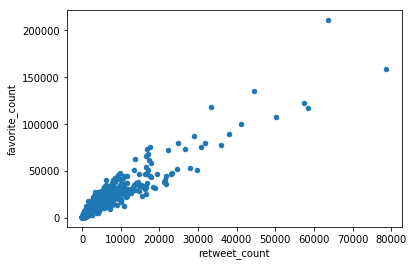

In [218]:
df1_master.plot(x='retweet_count', y='favorite_count',kind='scatter')

* It looks like there is positive relationship between retweet counts & favorite counts
* most of retweet counts are below 20000 
* most of favorite counts are below 50000

In [220]:
df1_master[['rating_numerator','rating_denominator','retweet_count','favorite_count']].describe()


,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2175.000000,2175.000000,2168.000000,2168.000000
mean,13.215172,10.492874,2548.186808,8334.065959
std,47.725696,7.019084,4763.520814,13058.288317
min,0.000000,0.000000,1.000000,51.000000
25%,10.000000,10.000000,533.750000,1734.000000
50%,11.000000,10.000000,1180.500000,3682.500000
75%,12.000000,10.000000,2810.750000,10169.250000
max,1776.000000,170.000000,78753.000000,210991.000000


**Which dog stage is the most common one?**

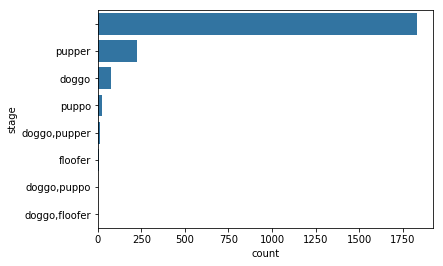

In [229]:
base_color=sb.color_palette()[0]
stage_order=df1_master['stage'].value_counts().index
sb.countplot(data=df1_master,y='stage', color=base_color, order=stage_order)

* pupper is the most common stage.

**Which dog breed is the most popular one?**

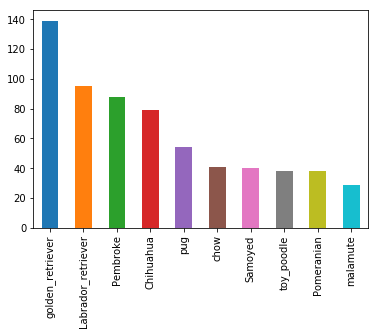

In [233]:

df1_master.prediction_1.value_counts().head(10).plot(kind='bar')

* Golden retriever is the most popular dog breed

**What are the top three tweets with most retweets?**

In [224]:
df1_master.sort_values(by='retweet_count', ascending=False).head(3)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,prediction_1,prediction_1_confidence,p1_dog,prediction_2,prediction_2_confidence,p2_dog,prediction_3,prediction_3_confidence,p3_dog
862,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,78753.0,...,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
39,884247878851493888,2017-07-10 03:08:17,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,,63536.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,739238157791694849,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,58399.0,...,1.0,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True


**Is there any relationships between ratings and retweets_count?**

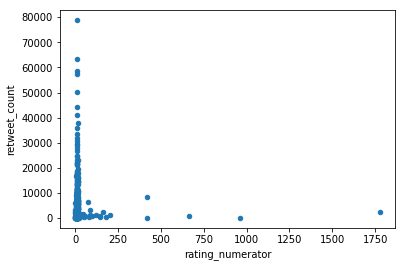

In [235]:
df1_master.plot(x='rating_numerator', y='retweet_count',kind='scatter')

The plot does not show direct relation ship between rating and retweet_counts